<center>

<H1> Гипотезы и машинное обучение <H1>

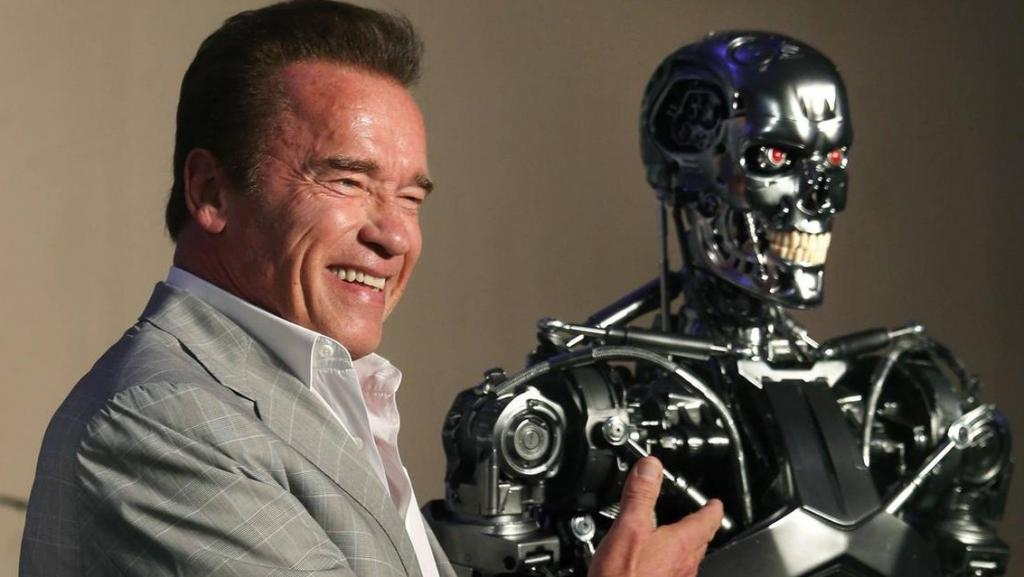

</center>

## Предисловие

В данном файле мы проверили ряд поставленных ранее гипотез с помощью различных статистик, дополнили описание некоторых закономерностей и сделали какое-никакое машинное обучение на наших данных (т.к. ранее мы не учитывали, что у видеокарт имеется некоторая тенденция к двухмодальности по многим признакам, появился ряд проблем, но обо всём по порядку)

In [ ]:
pip install catboost # Он нам пригодится в самом конце

In [ ]:
# Импорт библиотек
# От некоторых впоследствии отказались

import numpy as np
import pandas as pd
import re

import scipy.stats as sts
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import cross_val_score

from statsmodels.stats.weightstats import ztest as ztest

from catboost import CatBoostRegressor

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ExuberantSebastian/AnDan_Python_Project/main/EDA_2/data/GCCompanies.csv')

In [ ]:
df

Видеокарта   Цена комплектация  \
0                     Видеокарта SAPPHIRE RX580 8 Гб V2   9899       Retail   
1     Видеокарта ASUS Dual GeForce RTX 3060 V2 OC Ed...  36500       Retail   
2     Видеокарта GIGABYTE GeForce RTX 3070 Ti GAMING...  62000       Retail   
3     Видеокарта БУ AMD RADEON RX 580 8Gb OC ASRock ...   8700          OEM   
4     Видеокарта MSI GeForce RTX 3050 GAMING X 8G, R...  30734       Retail   
...                                                 ...    ...          ...   
1051  Видеокарта PCI-E nVidia MSI RTX 3050 Gaming X ...  31190       Retail   
1052  Видеокарта NVIDIA GeForce RTX 4070 MSI 12Gb (R...  90230       Retail   
1053    Видеокарта PALIT GeForce RTX 4070 GAMINGPRO 12G  79830       Retail   
1054  Видеокарта Inno3D nVidia GeForce RTX 3080 10Gb...  65367       Retail   
1055          Видеокарта SINOTEX Ninja Radeon RX 580 8G  14160       Retail   

     область применения                            особенности  \
0               игровая                                    нет   
1               игровая  необходимость дополнительного питания   
2               игровая                                    нет   
3               игровая  необходимость дополнительного питания   
4               игровая  необходимость дополнительного питания   
...                 ...                                    ...   
1051            игровая                                    нет   
1052            игровая                                    нет   
1053            игровая                                    нет   
1054            игровая                                    нет   
1055            игровая                                    нет   

      объем видеопамяти тип памяти  частота памяти  шина обмена с памятью  \
0                8192.0      GDDR5          1284.0                  256.0   
1               12288.0      GDDR6         15000.0                  192.0   
2                8192.0     GDDR6X         19000.0                  256.0   
3                8192.0      GDDR5          8000.0                  256.0   
4                8192.0      GDDR6         14000.0                  128.0   
...                 ...        ...             ...                    ...   
1051             8192.0      GDDR6         14000.0                  256.0   
1052            12288.0     GDDR6X          2610.0                  192.0   
1053            12288.0     GDDR6X         21000.0                  192.0   
1054            10240.0     GDDR6X         19000.0                  320.0   
1055             8192.0      GDDR5          1304.0                  256.0   

      частота видеопроцессора  ...  тип подключения  \
0                      1340.0  ...  PCI Express 3.0   
1                      1837.0  ...  PCI Express 4.0   
2                      1830.0  ...  PCI Express 4.0   
3                      1424.0  ...  PCI Express 3.0   
4                      1550.0  ...  PCI Express 4.0   
...                       ...  ...              ...   
1051                   1665.0  ...  PCI Express 4.0   
1052                   1920.0  ...  PCI Express 4.0   
1053                   1920.0  ...  PCI Express 4.0   
1054                   1755.0  ...  PCI Express 4.0   
1055                   1167.0  ...  PCI Express 3.0   

                                   поддержка технологий  \
0                                                   нет   
1     поддержка CUDA, поддержка HDCP, поддержка Vulk...   
2                                                   нет   
3                                                   нет   
4     поддержка CUDA, поддержка HDCP, поддержка трас...   
...                                                 ...   
1051                                                нет   
1052                                                нет   
1053                                                нет   
1054                                                нет   
1055                                                нет   

     раз

## Разминочка ##

Давайте проверим что-нибудь не особо нужное, но интересное, например разницу ожиданий стоимости карточек от NVIDIA и AMD <br> Думается очевидно, что мы должны отвергнуть H0, учитывая, что показывали графики на прошлом этапе, потому проверим гипотезу о том, что разница между ними состовляет менее 10000 на уровне значимости в 5% <br>

P.s. быть может NVIDIA и AMD не являются независимыми, но это разные компании с разныыми технологиями и разной ценовой политикой, так что мы предполагаем, что они всё таки независимы, для выполнения предпосылок

Вроде бы формула необходимой нам статистики выглядит примерно вот так, однако у AMD-карточек наблюдений не так много, возможно ассимптотика не сработает и мы просто получим какой-то бред

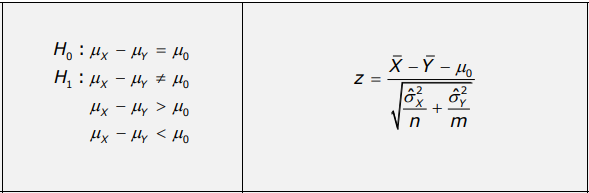

In [ ]:
# Была не была

N_mean = df['Цена'].loc[df['NVIDIA'] == True].mean()
A_mean = df['Цена'].loc[df['AMD'] == True].mean()

N_var = df['Цена'].loc[df['NVIDIA'] == True].var(ddof=1)
A_var = df['Цена'].loc[df['AMD'] == True].var(ddof=1)

n = df['Цена'].loc[df['NVIDIA'] == True].size
m = df['Цена'].loc[df['AMD'] == True].size

alpha = 0.05
z_crit = sts.norm.ppf(1 - alpha)

In [ ]:
z_obs = (N_mean - A_mean - 10000) / np.sqrt((N_var / n) + (A_var / m))
z_obs, z_crit

(2.521562632106656, 1.6448536269514722)

Очевидно, что данную **гипотезу мы отвергаем**, возможно стоит взять бОльшую разницу, скажем в 13000

In [ ]:
z_obs = (N_mean - A_mean - 13000) / np.sqrt((N_var / n) + (A_var / m))
z_obs, z_crit

(1.4312978399637664, 1.6448536269514722)

In [ ]:
# Проверим через функцию

a = df['Цена'].loc[df['NVIDIA'] == True]
b = df['Цена'].loc[df['AMD'] == True]

ztest(a, b, value=13000) # Как ни странно, но функция выдаёт меньшую статистику, будем считать, что она точнее

(1.1177177085561119, 0.26368757710826496)

А вот разница в 13000 уже звучит более убедительно, **нет оснований отвергать H0** <br>

Если опираться на реальную жизнь, то данные умозаключения имеют смысл, но они масштабируются в зависимости от того, в каком ценовом сегменте находится видеокарта (вспомните, что мы ранее писали про двухмодальность), т.е. условно одинаковые по производительности карточки от AMD стоят на 2-3к дешевле аналагов от NVIDIA, если брать сегмент до 15000, при том в производительности они могут даже выигрывать <br>

Если появившиеся в данный момент опасения подтвердятся, возможно придётся решить задачу классификации, ну либо же просто раскидать данные по установленным вручную критериям (в каком-то смысле это будет даже более логично, если бы целью данного проекта было практическое применение модели, но мы занимаемся обучением, так что это крайнее средство) <br>

Подводя маленький итог по проведённому тесту, стоит сказать, что сравнивать средние значения напрямую несколько некорректно

## Основные гипотезы ##

Первым, что стоит проверить, это гипотезы о независимости цены и основных числовых признаков. Для нас, конечно, важно наличие взаимосвязи.


In [ ]:
chi2_contingency(df[['Цена','объем видеопамяти']])[0:2]

(1774440.0775030258, 0.0)

In [ ]:
chi2_contingency(df[['Цена','шина обмена с памятью']])[0:2]

(262414.3409935178, 0.0)

In [ ]:
chi2_contingency(df[['Цена','частота памяти']])[0:2]

(4434466.6745004915, 0.0)

In [ ]:
chi2_contingency(df[['Цена','частота видеопроцессора']])[0:2]

(1292951.253427484, 0.0)

In [ ]:
chi2_contingency(df[['Цена','техпроцесс']])[0:2]

(254932.42296141823, 0.0)

In [ ]:
df['NVIDIA'] = df['NVIDIA'].astype(int)
df['AMD'] = df['AMD'].astype(int)
df['INTEL'] = df['INTEL'].astype(int)

Учитывая, что значения хи-квадрат достаточно большие, p-value при этом 0, гипотезы о независимости признаков отвергаются. Мы получили, что хотели: зависимость цены от различных важных характеристик видеокарты есть! Последний шажок сделан, теперь, казалось бы, ничего не мешает нам обучить какую-нибудь простенькую модель...

## Пробное МО ##

Перед обучением, хотелось сказать, что перед нами стоит весьма непростая задача ввиду большого разброса ценовых значний и меньших (по масштабу) разбросов в числовых характеристиках

In [ ]:
df['Цена'].max() / df['Цена'].min()

278.08

Давайте начнём с чего-то простого, с самого очевидного - линейной регрессии

In [ ]:
# Создаём модель

model = LinearRegression()
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=100)

y_train = df_train['Цена']
y_test = df_test['Цена']

X_train = df_train[['объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора','NVIDIA','AMD','INTEL']]
X_test = df_test[['объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора','NVIDIA','AMD','INTEL']]

In [ ]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
model.coef_

array([ 6.03329331e+00, -8.98737517e-01,  6.08781279e+01,  1.51780203e+01,
        1.22315005e+04, -1.00750385e+04, -2.15646197e+03])

In [ ]:
model.intercept_

-39919.11260161554

Т-а-а-а-а-а-а-к, это нездоровая вещь, коэффициент получился отрицательным, так ещё и весит больше, чем цены многих видеокарт, да что уж там, уровень выше, чем у целого бюджетного сегмента, эту проблему надо как-то решать

In [ ]:
r2_score(y_test,y_pred)

0.7073389299744282

In [ ]:
mse(y_test,y_pred)

524512130.2118497

In [ ]:
mae(y_test,y_pred)

15595.414945503082

In [ ]:
mape(y_test,y_pred) # это ужасно...

1.0671597825011192

Как мы видим, ошибки тоже просто огромные, это не есть хорошо, в который раз вспоминаем про многомодальность числовых признаков. Нам на ум приходит несколько решений данной проблемы, **первое - очевидное**, можно попробовать провести кластеризацию, обучить на определённых кластерах несколько моделей и снова создать линейную модель, либо же использовать кластер как дополнительный признак при новом обучении. **Второе - практическое**, вручную создать ещё один новый признак, раздробить наши данные на несколько выборок (по классам) меньшего размера и повторить действия из первого. **Третье - упоротое**, попробовать сгладить наши данные, чтобы модель хотя бы не создавала отрицательных значений, но этот путь война полон огромных погрешностей и вероятнее всего - бесполезен.

## Кластеризация ##

Из перечисленного списка мы решили применить ранее неизведанный, но наиболее логичный способ, а именно - **кластеризацию**. Вроде бы на курсе **обучение без учителя** освещалось лишь вскользь, но почему бы не использовать его, попробуем применить метод **к-средних**, именно он должен разделить наши данные наиболее адекватным образом

In [ ]:
K_mean_model = KMeans(n_clusters=4)

K_mean_model.fit(df[['Цена','объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора']])


KMeans(n_clusters=4)

In [ ]:
clusters = K_mean_model.labels_
clusters

array([0, 1, 1, ..., 3, 1, 0], dtype=int32)

In [ ]:
K_mean_model.cluster_centers_

array([[1.26272642e+04, 4.30450314e+03, 7.44026834e+03, 1.43966457e+02,
        1.29908281e+03],
       [4.29876862e+04, 9.43169501e+03, 1.47482493e+04, 2.18369501e+02,
        1.78316276e+03],
       [2.00868044e+05, 2.35290444e+04, 1.73495556e+04, 3.74044444e+02,
        2.35288889e+03],
       [9.38281140e+04, 1.41990466e+04, 1.82168575e+04, 2.60642487e+02,
        2.10566580e+03]])

In [ ]:
df_cl = df

In [ ]:
df_cl['Кластер'] = clusters
df_cl

Видеокарта   Цена комплектация  \
0                     Видеокарта SAPPHIRE RX580 8 Гб V2   9899       Retail   
1     Видеокарта ASUS Dual GeForce RTX 3060 V2 OC Ed...  36500       Retail   
2     Видеокарта GIGABYTE GeForce RTX 3070 Ti GAMING...  62000       Retail   
3     Видеокарта БУ AMD RADEON RX 580 8Gb OC ASRock ...   8700          OEM   
4     Видеокарта MSI GeForce RTX 3050 GAMING X 8G, R...  30734       Retail   
...                                                 ...    ...          ...   
1051  Видеокарта PCI-E nVidia MSI RTX 3050 Gaming X ...  31190       Retail   
1052  Видеокарта NVIDIA GeForce RTX 4070 MSI 12Gb (R...  90230       Retail   
1053    Видеокарта PALIT GeForce RTX 4070 GAMINGPRO 12G  79830       Retail   
1054  Видеокарта Inno3D nVidia GeForce RTX 3080 10Gb...  65367       Retail   
1055          Видеокарта SINOTEX Ninja Radeon RX 580 8G  14160       Retail   

     область применения                            особенности  \
0               игровая                                    нет   
1               игровая  необходимость дополнительного питания   
2               игровая                                    нет   
3               игровая  необходимость дополнительного питания   
4               игровая  необходимость дополнительного питания   
...                 ...                                    ...   
1051            игровая                                    нет   
1052            игровая                                    нет   
1053            игровая                                    нет   
1054            игровая                                    нет   
1055            игровая                                    нет   

      объем видеопамяти тип памяти  частота памяти  шина обмена с памятью  \
0                8192.0      GDDR5          1284.0                  256.0   
1               12288.0      GDDR6         15000.0                  192.0   
2                8192.0     GDDR6X         19000.0                  256.0   
3                8192.0      GDDR5          8000.0                  256.0   
4                8192.0      GDDR6         14000.0                  128.0   
...                 ...        ...             ...                    ...   
1051             8192.0      GDDR6         14000.0                  256.0   
1052            12288.0     GDDR6X          2610.0                  192.0   
1053            12288.0     GDDR6X         21000.0                  192.0   
1054            10240.0     GDDR6X         19000.0                  320.0   
1055             8192.0      GDDR5          1304.0                  256.0   

      частота видеопроцессора  ...  \
0                      1340.0  ...   
1                      1837.0  ...   
2                      1830.0  ...   
3                      1424.0  ...   
4                      1550.0  ...   
...                       ...  ...   
1051                   1665.0  ...   
1052                   1920.0  ...   
1053                   1920.0  ...   
1054                   1755.0  ...   
1055                   1167.0  ...   

                                   поддержка технологий  \
0                                                   нет   
1     поддержка CUDA, поддержка HDCP, поддержка Vulk...   
2                                                   нет   
3                                                   нет   
4     поддержка CUDA, поддержка HDCP, поддержка трас...   
...                                                 ...   
1051                                                нет   
1052                                                нет   
1053                                                нет   
1054                                                нет   
1055                                                нет   

     разъем дополнительного питания максимальное разрешение  \
0                             8 pin               7680x4320   
1                             8 pin               7680x4320   
2                     8

<H4> Теперь визуализируем полученный результат <H4>

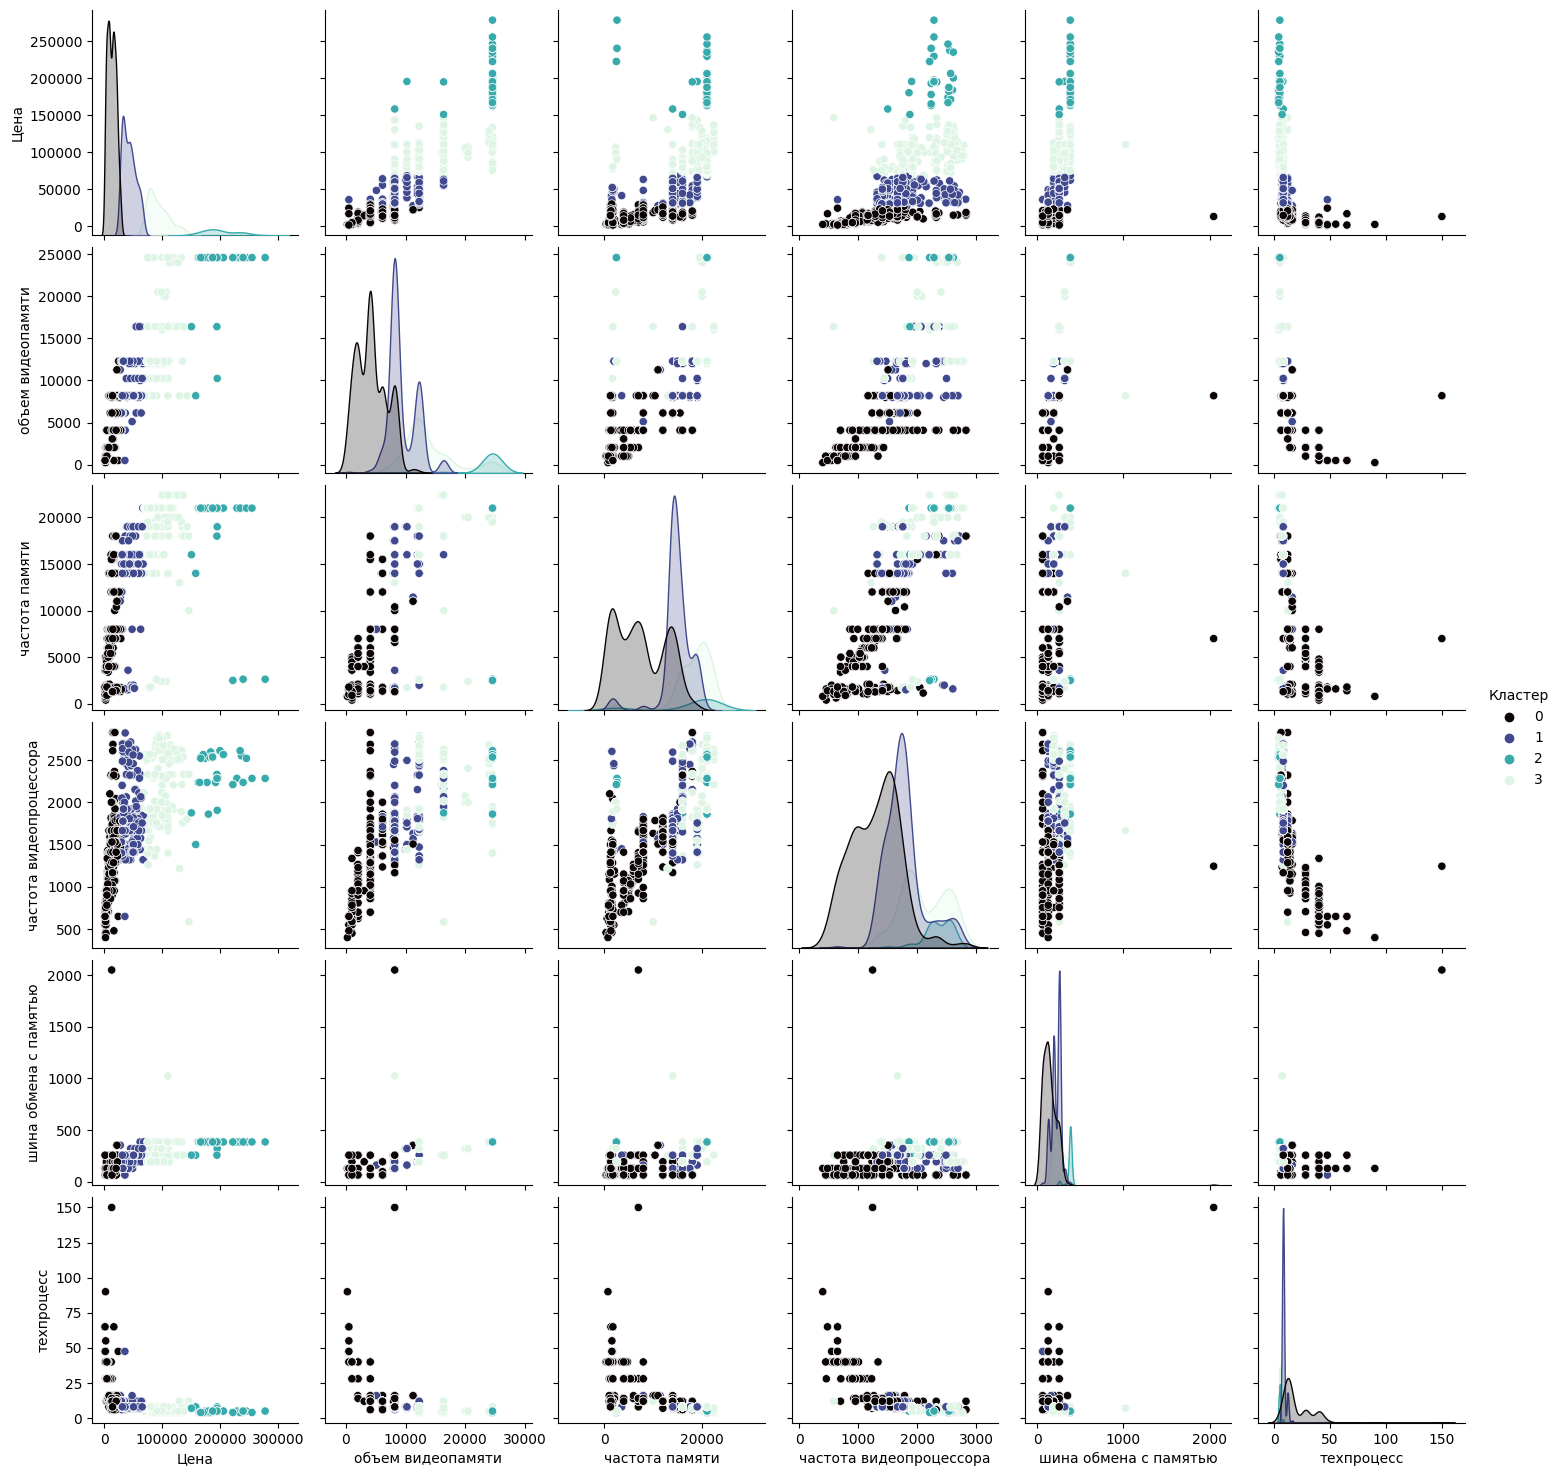

In [ ]:
num_data = ['Цена',
            'объем видеопамяти',
            'частота памяти',
            'частота видеопроцессора',
            'шина обмена с памятью',
            'техпроцесс',
            'Кластер']

sns.pairplot(df_cl[num_data], hue='Кластер', palette='mako');

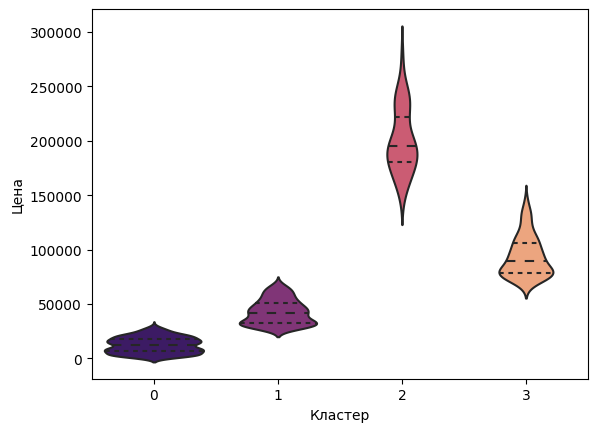

In [ ]:
# Посмотрим, что там по "плотности" у цен

sns.violinplot(x='Кластер',
               y='Цена',
               data=df_cl,
               inner="quartile",
               palette='magma')

plt.xlabel('Кластер')
plt.ylabel('Цена');

Как мы видим, стоковый к-метод так хорошо всё нам поделил, что видимо даже не придётся страдать с настройкой параметров. Исходя из данных графиков можно сделать парочку выводов: <br>
1. Кластеризатор видимо придал цене большой вес, а это именно то, что мы от него хотели, т.к. в данном случае кластеры по сути представляют из себя ценовые сегменты

2. Мы неспроста использовали 4 кластера, поскольку сейчас на рынке условно присутствует 4 различных ценовых сегмента (бюджетный, средний, топовый и передовой, рабочие видеокарты с их особенностями в расчёт не берём, это уже 5 сегмент), у которых на графиках наблюдаются явные неценовые закономерности, такие как повышенная частота памяти или пониженный техпроцесс...

3. Видно, что даже сейчас у кластеров присутствует некоторая двухмодальность, конечно, можно было бы и дальше дробить наше значение, но это уже будет противеорчить здравому смыслу, то, что в некоторых случаях графики пересекаются - нормально, ибо у нас кластеризация шла не только по ценам, но и по совокупности параметров

Попробуем интереса ради прогнать наши данные через ту же линейную регрессию и посмотрим, повлияют ли на неё кластеры в роли коэффициентов

In [ ]:
model = LinearRegression()
df_train, df_test = train_test_split(df_cl, test_size = 0.2, random_state=100)

y_train = df_train['Цена']
y_test = df_test['Цена']

X_train = df_train[['объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора','NVIDIA','AMD','INTEL', 'Кластер']]
X_test = df_test[['объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора','NVIDIA','AMD','INTEL', 'Кластер']]

In [ ]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
model.coef_, model.intercept_ # Как мы видим, стало лучше?!?

(array([ 4.92049091e+00, -1.46424508e+00,  6.26242710e+01,  1.37157615e+01,
         8.95204921e+03, -9.52895732e+03,  5.76908109e+02,  1.13037579e+04]),
 -29762.22547601736)

In [ ]:
r2_score(y_test,y_pred), mse(y_test,y_pred), mae(y_test,y_pred), mape(y_test,y_pred) # Как мы подтверждаем, стало только лучше?!?

(0.747849339595008, 451908687.4512928, 13875.258569884101, 0.8414639233398918)

*Небольшое пояснение к знакам вопроса* <br>

В первый раз модель выдала худшие результаты, во второй тоже, но сегодня при перезапуске она внезапно выдала меньший свободный член и лучшие результаты, ошибки также уменьшились...

Попробуем применить **кросс-валидацию**

In [ ]:
# код позаимствован с 7 семинара

cv_scores = cross_val_score(model,
                            X_train,
                            y_train,
                            cv=6,
                            scoring='neg_mean_absolute_percentage_error')

In [ ]:
-np.mean(cv_scores) # и в новь какой-то ужас

0.7491087034496992

Тут одному из авторов в голову пришла гениальная идея, за которую на практике наверное дали бы по шапке, но это исследование, так что почему бы и нет

https://youtu.be/Y7SBSlNwJxc

In [ ]:
def cluster_regression(cl_num):

  df_def = df_cl.loc[df_cl['Кластер'] == cl_num]

  model = LinearRegression()
  df_train, df_test = train_test_split(df_def, test_size = 0.2, random_state=100)

  y_train = df_train['Цена']
  y_test = df_test['Цена']

  X_train = df_train[['объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора','NVIDIA','AMD','INTEL']]
  X_test = df_test[['объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора','NVIDIA','AMD','INTEL']]

  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  inter = model.intercept_
  metr = r2_score(y_test,y_pred), mse(y_test,y_pred), mae(y_test,y_pred), mape(y_test,y_pred)

  return cl_num, inter, metr


In [ ]:
for i in range(4):
  print('\nНомер кластера:', cluster_regression(i)[0],
        '\nСвободный член:', cluster_regression(i)[1],
        '\nr_2:', cluster_regression(i)[2][0],
        '\nMSE:', cluster_regression(i)[2][1],
        '\nMAE:', cluster_regression(i)[2][2],
        '\nMAPE:', cluster_regression(i)[2][3])



Номер кластера: 0 
Свободный член: -3967.9456426537927 
r_2: 0.6858065142562864 
MSE: 15399196.720852932 
MAE: 3026.973941776099 
MAPE: 0.33861139097162135

Номер кластера: 1 
Свободный член: -5531.929364636846 
r_2: 0.31187196624654445 
MSE: 79994208.28126062 
MAE: 7069.866188634018 
MAPE: 0.1681246207159552

Номер кластера: 2 
Свободный член: 55539414.10883807 
r_2: -167878.6818628219 
MSE: 85388841521237.53 
MAE: 4324099.010222973 
MAPE: 22.189412055731754

Номер кластера: 3 
Свободный член: 22402.75332672312 
r_2: 0.5519951954412334 
MSE: 130906038.35247025 
MAE: 8868.116239001221 
MAPE: 0.08992014275203775


In [ ]:
df_cl.loc[df_cl['Кластер'] == 2].shape

(45, 22)

<center>

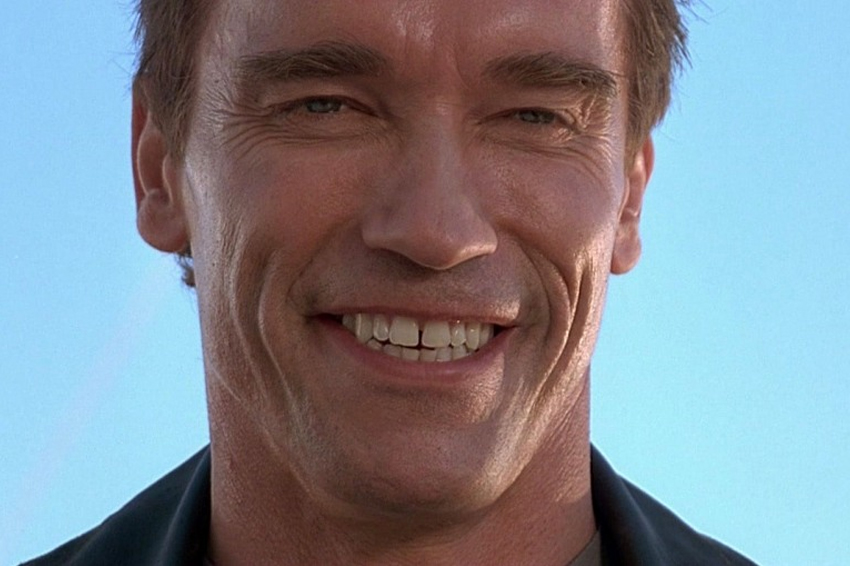

</center>

Как мы видим, стандартная модель работает +- нормально только с 0 и 3 кластером, ака бюджетный и топовый сегменты, остальные же выдают низкие или даже отрицательные значения r_2... (это как?!?) и довольно большие ошибки, хотя MAPE держится в пределах нормы <br>

У второго кластера ("Передовые" видеокарты по типу RTX4090, являющейся текущим лидером по производительности) большие проблемы из-за недостатка наблюдений и большого разброса значений <br>

Быть может то происходит из-за дробления и без того невеликого массива данных, но тут нужна либо настройка параметров, либо другие способы <br>

Отказываться от обучения регрессии мы не намерены, а потому придётся использовать что-то потяжелее, чем стандартный модуль из скалёрна

## CAT BOOST ##

<center>

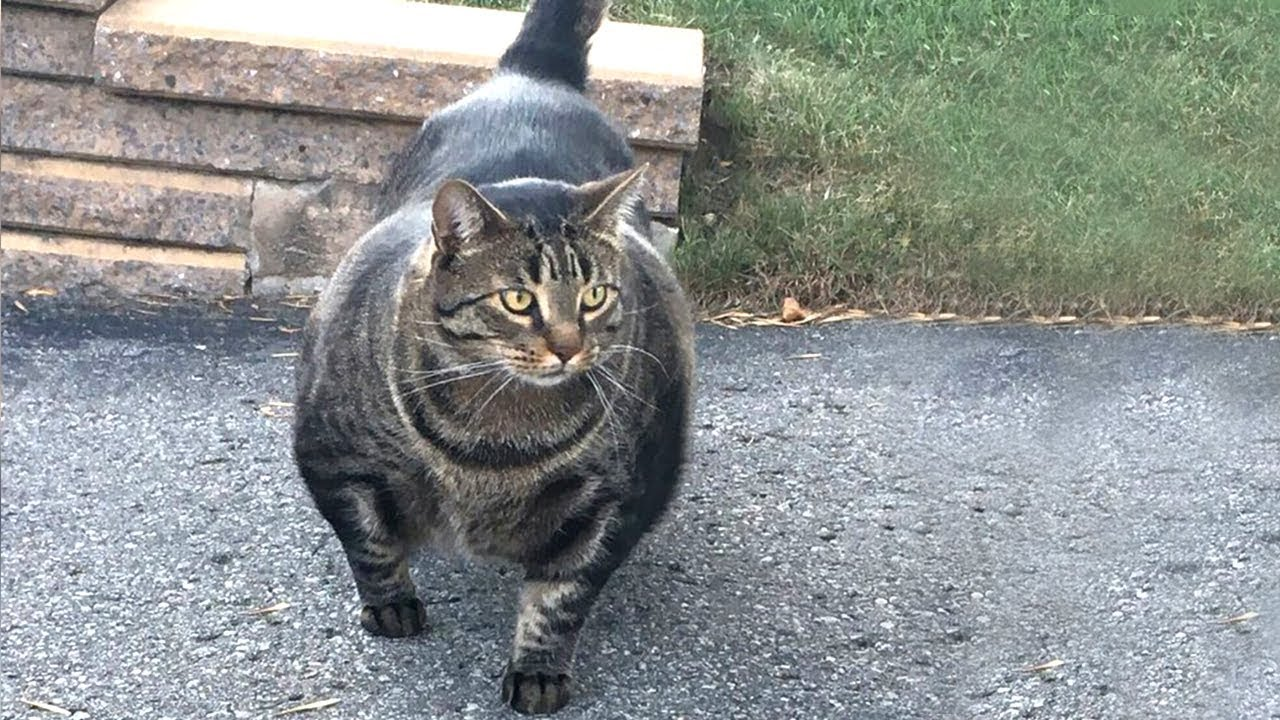

</center>

https://youtu.be/E1kisF5G4ik

In [ ]:
model = CatBoostRegressor(loss_function='RMSE')

In [ ]:
df_train, df_test = train_test_split(df_cl, test_size = 0.2, random_state=100)

y_train = df_train['Цена']
y_test = df_test['Цена']

X_train = df_train[['объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора','NVIDIA','AMD','INTEL']]
X_test = df_test[['объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора','NVIDIA','AMD','INTEL']]

model.fit(X_train,y_train, verbose=False, plot=True) # Вроде бы он умеет даже рисовать прогресс, давайте затестим
y_pred=model.predict(X_test)

metr = r2_score(y_test,y_pred), mse(y_test,y_pred), mae(y_test,y_pred), mape(y_test,y_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Почему-то с графиком не получилось, быть может коллаб просто не приспособлен для этого :(

P.s. Мы реально пытались, но по итогу ничего не получилось

In [ ]:
print(metr)

(0.8908068693804625, 195697779.48515666, 7241.029249791017, 0.27159040263540263)


Вот так Кэтбуст, RMSE 0.89 без донастройки параметров, мб хоть он сможет починить написанную ранее функцию

In [ ]:
def cluster_cat_regression(cl_num):

  df_def = df_cl.loc[df_cl['Кластер'] == cl_num]

  model = CatBoostRegressor(loss_function='RMSE')
  df_train, df_test = train_test_split(df_def, test_size = 0.2, random_state=100)

  y_train = df_train['Цена']
  y_test = df_test['Цена']

  X_train = df_train[['объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора','NVIDIA','AMD','INTEL']]
  X_test = df_test[['объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора','NVIDIA','AMD','INTEL']]

  model.fit(X_train,y_train, verbose=False)
  y_pred=model.predict(X_test)

  metr = r2_score(y_test,y_pred), mse(y_test,y_pred), mae(y_test,y_pred), mape(y_test,y_pred)

  return cl_num, metr

In [ ]:
try_list = {'n': [],
            'r_2': [],
            'MSE': [],
            'MAE': [],
            'MAPE': []}

for i in range(4):
  n = cluster_cat_regression(i)[0]
  r_2 = cluster_cat_regression(i)[1][0]
  MSE = cluster_cat_regression(i)[1][1]
  MAE = cluster_cat_regression(i)[1][2]
  MAPE = cluster_cat_regression(i)[1][3]

  try_list['n'].append(n)
  try_list['r_2'].append(r_2)
  try_list['MSE'].append(MSE)
  try_list['MAE'].append(MAE)
  try_list['MAPE'].append(MAPE)

In [ ]:
tl = pd.DataFrame(try_list)
tl

n       r_2           MSE           MAE      MAPE
0  0  0.708232  1.430008e+07   2642.277087  0.349700
1  1  0.326091  7.834123e+07   6866.274107  0.161381
2  2  0.116872  4.491866e+08  16237.874681  0.086137
3  3  0.479627  1.520520e+08   9347.830285  0.094504

Как мы можем увидеть, качество модели в общем выросло, теперь мы хотя бы можем видеть неотрицательные R_2_Score, но для бОльшего качество нужно больше данных, которых у нас, увы, нет...

Попробуем кастомизировать наши параметры для модели, использующей кластеры в качестве параметра

In [ ]:
model = CatBoostRegressor(iterations= 1500,
                          loss_function='RMSE',
                          depth=10,
                          verbose=False) # не исключаю, что 1.5к итерацию могут переобучить модель

y_train = df_train['Цена']
y_test = df_test['Цена']

X_train = df_train[['объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора','NVIDIA','AMD','INTEL', 'Кластер']]
X_test = df_test[['объем видеопамяти','частота памяти','шина обмена с памятью','частота видеопроцессора','NVIDIA','AMD','INTEL', 'Кластер']]

model.fit(X_train,y_train, verbose=False)
y_pred = model.predict(X_test)

metr = r2_score(y_test,y_pred), mse(y_test,y_pred), mae(y_test,y_pred), mape(y_test,y_pred)

In [ ]:
print('\nr_2:', metr[0],
      '\nMSE:', metr[1],
      '\nMAE:', metr[2],
      '\nMAPE:', metr[3])


r_2: 0.9447283036971484 
MSE: 99058870.95163687 
MAE: 5251.228118819776 
MAPE: 0.19056462184797254


Качество модели стало намного лучше, но, возможно, тут случилось переобучение, либо же модель оказалась простоватой. Хотя судя по MAPE этого не произошло, и мы действительно провели нормальное обучение

## Выводы ##

В ходе данного исследования мы провели довольно тяжкий парсинг маркетплэйса, длительную и качественную обработку и первичную разведку полученных данных, создали новые признаки на основе названий полученных данных, построили несколько гипотез, а также провели машинное обучение после их проверки. <br>

В данном файле представленны два последних пункта проделанной работы. Если с проверкой гипотез проблем не возникло, то вот с машинным обучением пришлось постараться. Линейная регрессия из скалёрна не дала качественных результатов, потому пришлось проводить кластеризацию и привлекать сторонние методы, такие как кросс-валидация (хоть особо мы и не углублялись в неё) и кэтбуст. Для вашего удобства также провели дополнительную визуализацию по кластеризации, чтобы наглядно показать, как модель поделила наши данные. <br>

В принципе можно сказать, что мы получили нормальные результаты в ходе нашего обучения, модель может выдавать адекватные значения метрик для всех кластеров кроме второго ввиду невозможности нормально его обучить... <br>

Итоговые MAPE в 19% и MAE в 5к говорят нам о том, что предсказания не слишком отклоняются от своих реальных значений, особенно учитывая тот факт, что предсказываемым признаком является цена, которая у наших данных может различаться в 278 раз. <br>

<h4> Спасибо за просмотр нашей работы! <h4>

<center>

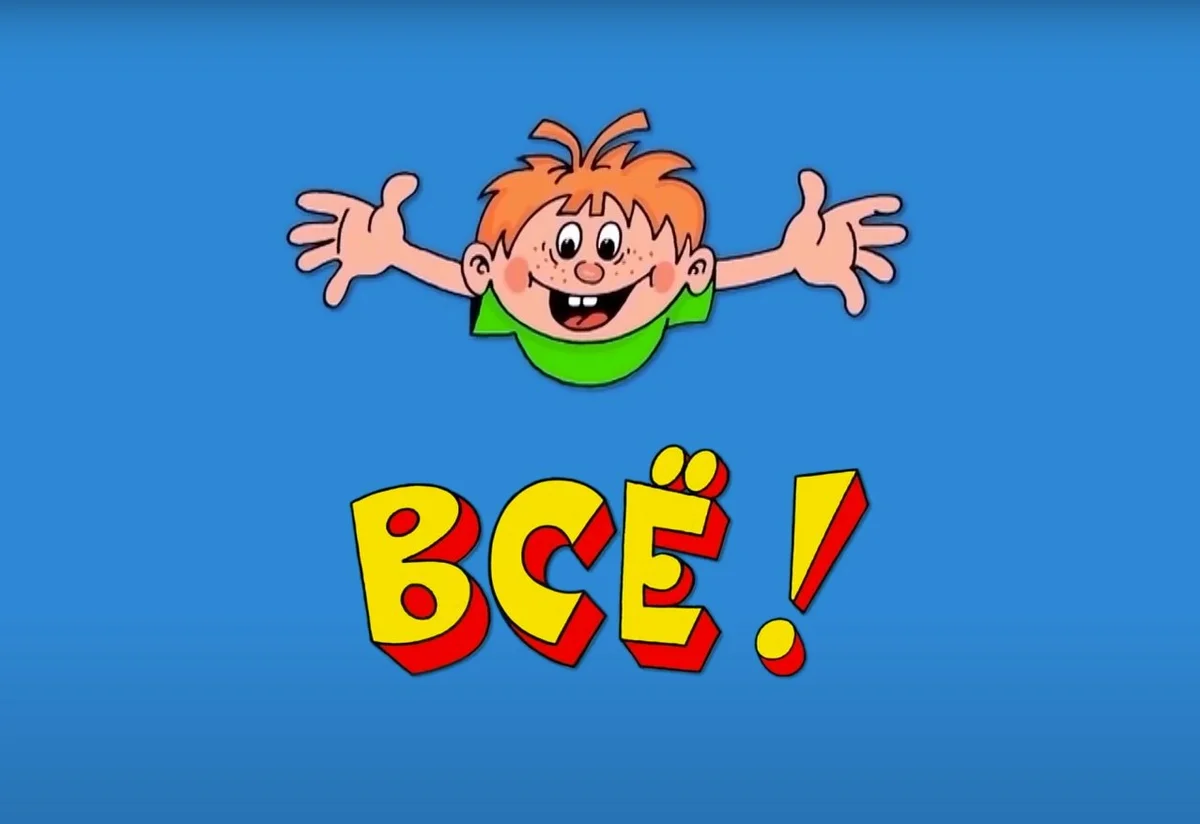

</center>